In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from ast import literal_eval as make_tuple

In [2]:
goal_x=5
goal_y=5

In [3]:
R=pd.read_csv('Resultats.csv')
R

,r_t,a_t,s_t,s_t_p_1,id_simulation
0,-2.703613,"(2, 1)","(8, 1)","(9, 1)",0
1,-6.000000,"(0, 3)","(9, 1)","(9, 1)",0
2,-6.000000,"(0, 3)","(9, 1)","(9, 1)",0
3,-4.100595,"(1, 2)","(9, 1)","(8, 1)",0
4,-4.656267,"(1, 2)","(8, 1)","(7, 1)",0
...,...,...,...,...,...
114615,-6.000000,"(0, 4)","(9, 14)","(9, 14)",1999
114616,-5.126792,"(1, 3)","(9, 14)","(9, 15)",1999
114617,-6.000000,"(0, 2)","(9, 15)","(9, 15)",1999
114618,-6.000000,"(0, 1)","(9, 15)","(9, 15)",1999


In [4]:
# tocsv traduit les tuple en str. On a besoin de les reconvertir en tuple. 
R["a_t"]=R["a_t"].apply(make_tuple)
R["s_t"]=R["s_t"].apply(make_tuple)
R["s_t_p_1"]=R["s_t_p_1"].apply(make_tuple)
R

,r_t,a_t,s_t,s_t_p_1,id_simulation
0,-2.703613,"(2, 1)","(8, 1)","(9, 1)",0
1,-6.000000,"(0, 3)","(9, 1)","(9, 1)",0
2,-6.000000,"(0, 3)","(9, 1)","(9, 1)",0
3,-4.100595,"(1, 2)","(9, 1)","(8, 1)",0
4,-4.656267,"(1, 2)","(8, 1)","(7, 1)",0
...,...,...,...,...,...
114615,-6.000000,"(0, 4)","(9, 14)","(9, 14)",1999
114616,-5.126792,"(1, 3)","(9, 14)","(9, 15)",1999
114617,-6.000000,"(0, 2)","(9, 15)","(9, 15)",1999
114618,-6.000000,"(0, 1)","(9, 15)","(9, 15)",1999


In [5]:
type(R["s_t"].tolist()[0])

tuple

In [6]:
def q_learning(situations, eta, gamma):
    # Initialisation du dictionnaire Q avec des valeurs nulles
    liste_simulations = np.unique(situations["id_simulation"].tolist())
    Q={}
    for simulation in liste_simulations:
            sous_base = situations[situations["id_simulation"] == simulation]
            for row in sous_base.itertuples():
                etat_k = row.s_t
                action_k = row.a_t
                cle = (etat_k, action_k)
                Q[cle]=0
    
    
    threshold = 1e-3

    convergence = False
    while not convergence:
        Q_ant = dict(Q)  # Sauvegarde des valeurs de Q de l'itération précédente
        
        for simulation in liste_simulations:
            sous_base = situations[situations["id_simulation"] == simulation]
            for row in sous_base.itertuples():
                etat_k =row.s_t
                action_k = row.a_t
                cle = (etat_k, action_k)
                recompense = row.r_t
                situation_t_plus = row.s_t_p_1


                list_cle = [key for key in list(Q_ant.keys()) if key[0] == situation_t_plus]

                if len(list_cle) == 0:
                     Q_max = 0
                else:
                    Q_max = np.max([Q_ant[cle] for cle in list_cle])

                # Calcul de la valeur de Q en utilisant la formule de mise à jour de Q-learning
                # Q_max = np.max([Q_ant.get((situation_t_plus, int(a))) for a in actions["id"].tolist()])
                Q[cle] = (1 - eta) * Q_ant[cle] + eta * (recompense + gamma * Q_max)
        
        # Vérification de la convergence
        dist = sum(np.absolute(np.subtract(list(Q.values()),list(Q_ant.values()))))
        # convergence = all(abs(Q[k] - Q_ant[k]) < 1e-6 for k in Q.keys())
        if dist < threshold:
            convergence = True
    
    return Q



In [7]:
eta=0.7
gamma=0.6

In [8]:
R

,r_t,a_t,s_t,s_t_p_1,id_simulation
0,-2.703613,"(2, 1)","(8, 1)","(9, 1)",0
1,-6.000000,"(0, 3)","(9, 1)","(9, 1)",0
2,-6.000000,"(0, 3)","(9, 1)","(9, 1)",0
3,-4.100595,"(1, 2)","(9, 1)","(8, 1)",0
4,-4.656267,"(1, 2)","(8, 1)","(7, 1)",0
...,...,...,...,...,...
114615,-6.000000,"(0, 4)","(9, 14)","(9, 14)",1999
114616,-5.126792,"(1, 3)","(9, 14)","(9, 15)",1999
114617,-6.000000,"(0, 2)","(9, 15)","(9, 15)",1999
114618,-6.000000,"(0, 1)","(9, 15)","(9, 15)",1999


In [9]:
QL = q_learning(eta=eta,gamma=gamma,situations=R)

In [10]:
QL

{((8, 1), (2, 1)): -4.36207318144009,
 ((9, 1), (0, 3)): -7.65846001086933,
 ((9, 1), (1, 2)): -5.624855506379956,
 ((8, 1), (1, 2)): -5.644611276209069,
 ((7, 1), (2, 4)): -4.587424629657395,
 ((7, 0), (2, 2)): -3.325753193824939,
 ((6, 0), (3, 1)): -3.5663698094812606,
 ((7, 0), (1, 2)): -5.624318363830403,
 ((6, 0), (1, 2)): -6.629475634258403,
 ((5, 0), (3, 3)): -0.2885928661753291,
 ((5, 1), (1, 3)): 0.5155230291564987,
 ((5, 2), (2, 4)): -1.198500818413333,
 ((5, 1), (0, 1)): -4.46877696169932,
 ((5, 1), (2, 2)): -2.412759311837428,
 ((4, 1), (2, 2)): -3.0415990797656254,
 ((3, 1), (0, 1)): -6.695783410010076,
 ((3, 1), (0, 2)): -6.695783410010076,
 ((3, 1), (0, 3)): -6.695783410010076,
 ((3, 1), (3, 2)): -3.4983002006928334,
 ((2, 1), (3, 4)): -3.5760823047379073,
 ((2, 0), (3, 1)): -3.467623917943537,
 ((3, 0), (1, 2)): -6.591608349895526,
 ((2, 0), (1, 3)): -7.783307211621563,
 ((2, 1), (2, 4)): -4.329963816027313,
 ((2, 0), (2, 1)): -4.527542698090032,
 ((3, 0), (3, 4)): -61.

In [11]:
Etats=[]
best_action=[]
best_reward=[]
for cle in QL.keys():
    Liste_actions=[]
    Liste_recompense=[]
    if cle[0] not in Etats: 
        Etats.append(cle[0])
        for cle2,valeur_recompense in QL.items():
            if cle[0]==cle2[0]:
                Liste_actions.append(cle2[1])
                Liste_recompense.append(valeur_recompense)
        indice_meilleur=np.argmax(Liste_recompense)
        MR_action=Liste_actions[indice_meilleur]
        MR_recompense=Liste_recompense[indice_meilleur]
        best_action.append(MR_action)
        best_reward.append(MR_recompense)
Best_action_per_state=pd.DataFrame({"etats":Etats,"Meilleure_action":best_action,"Meilleure_recompense":best_reward})

In [12]:
Best_action_per_state

,etats,Meilleure_action,Meilleure_recompense
0,"(8, 1)","(3, 2)",-2.540433
1,"(9, 1)","(3, 1)",-2.764100
2,"(7, 1)","(3, 3)",-1.647239
3,"(7, 0)","(3, 3)",-2.540433
4,"(6, 0)","(3, 3)",-1.711979
...,...,...,...
395,"(1, 5)","(3, 1)",2.537471
396,"(0, 5)","(3, 1)",0.635186
397,"(5, 19)","(3, 2)",-3.554357
398,"(0, 6)","(3, 4)",-0.745709


In [13]:
Liste_Pos_abs=[]
Liste_Pos_abs2=[]
Decision_v=[]
Decision_angle=[]
for row in Best_action_per_state.itertuples():
    pos_x=row.etats[0]
    pos_y=row.etats[1]
    Liste_Pos_abs.append(pos_x)
    Liste_Pos_abs2.append(pos_y)
    V=row.Meilleure_action[0]
    theta=row.Meilleure_action[1]
    Decision_v.append(V)
    Decision_angle.append(theta)

In [14]:
DF_graphique=pd.DataFrame({"angle_pris":Decision_angle,"vitesse_prise":Decision_v,"Pos_x":Liste_Pos_abs,"Pos_y":Liste_Pos_abs2})

In [15]:
DF_graphique.dtypes

angle_pris       int64
vitesse_prise    int64
Pos_x            int64
Pos_y            int64
dtype: object

## Choix de la vitesse

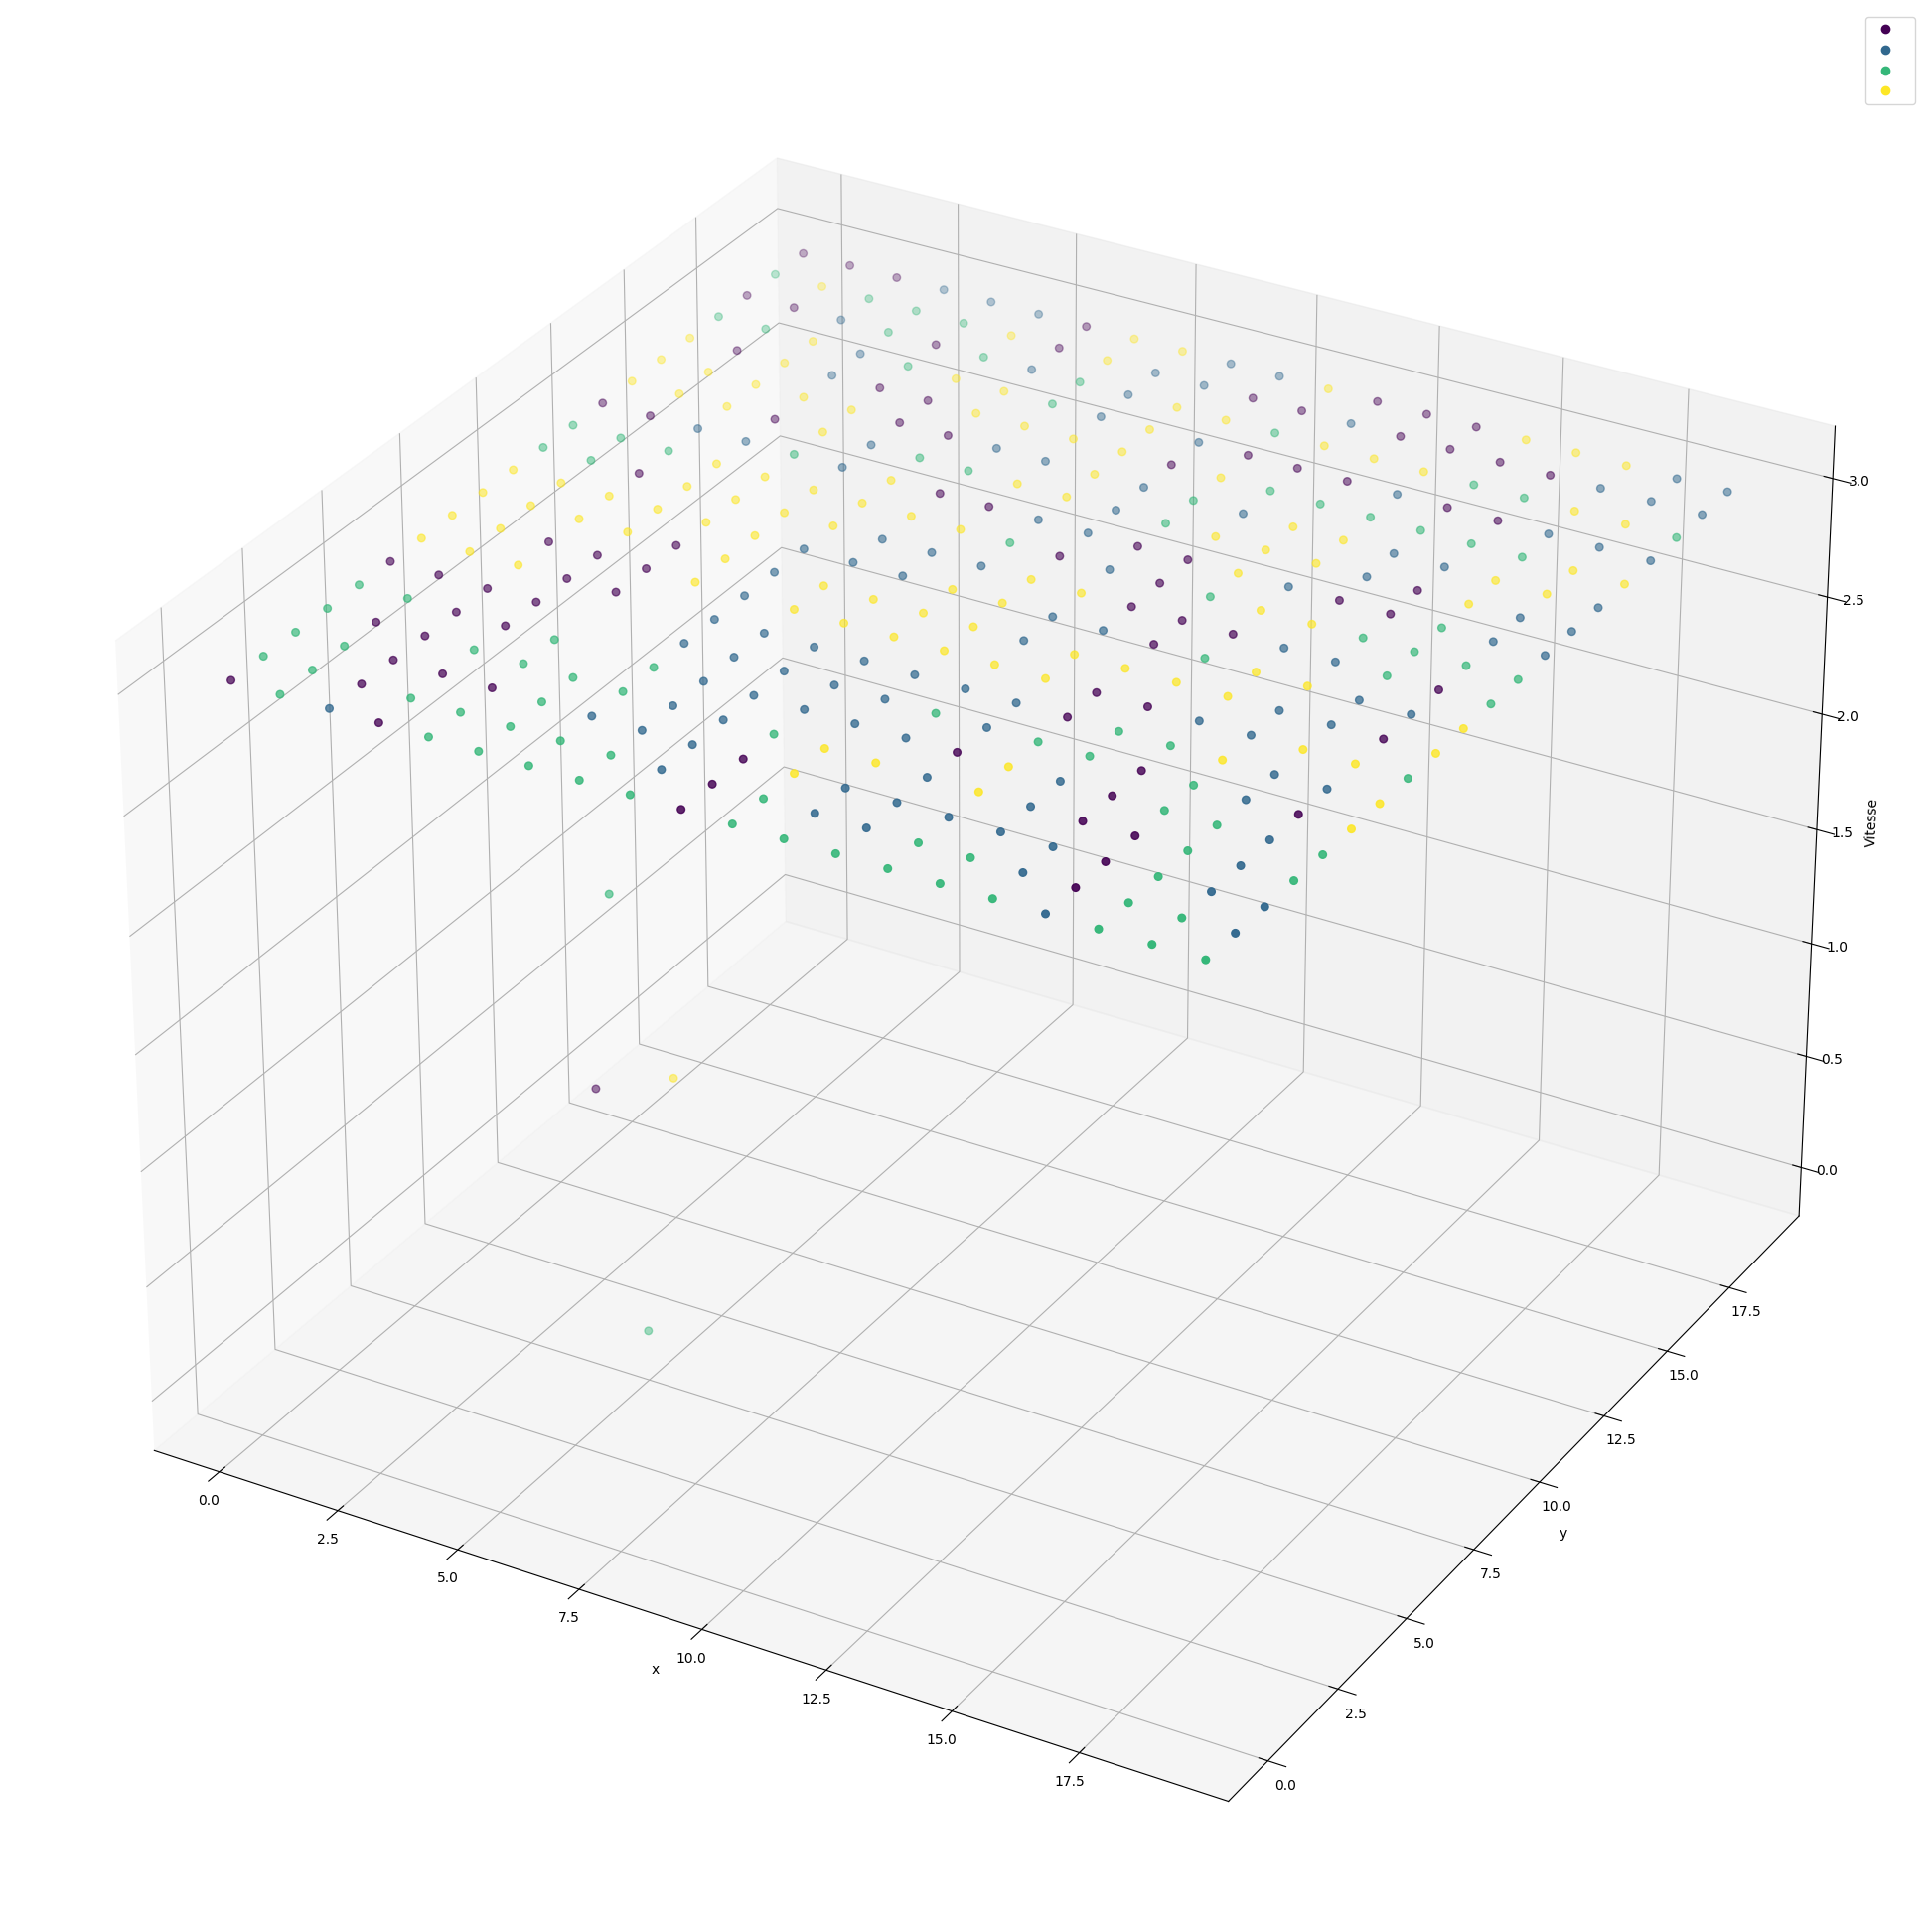

In [16]:
ZL = [0,3]
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ANGLES=["1","2","3","4"]
scatter=ax.scatter(DF_graphique.Pos_x,DF_graphique.Pos_y,DF_graphique.vitesse_prise,c=DF_graphique.angle_pris,s=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Vitesse')
plt.legend(handles=scatter.legend_elements()[0])
plt.show()

Dans la grande majorité des cas, la plus grande vitesse est choisie. Par ailleurs, la voiture reste immobile en $(5,5)$, ce qui correspond à la destination. Cependant, d'autres coordonnées sont caractérisées par ce comportement. L'algorithme est donc perfectible.  

## Choix de l'action.

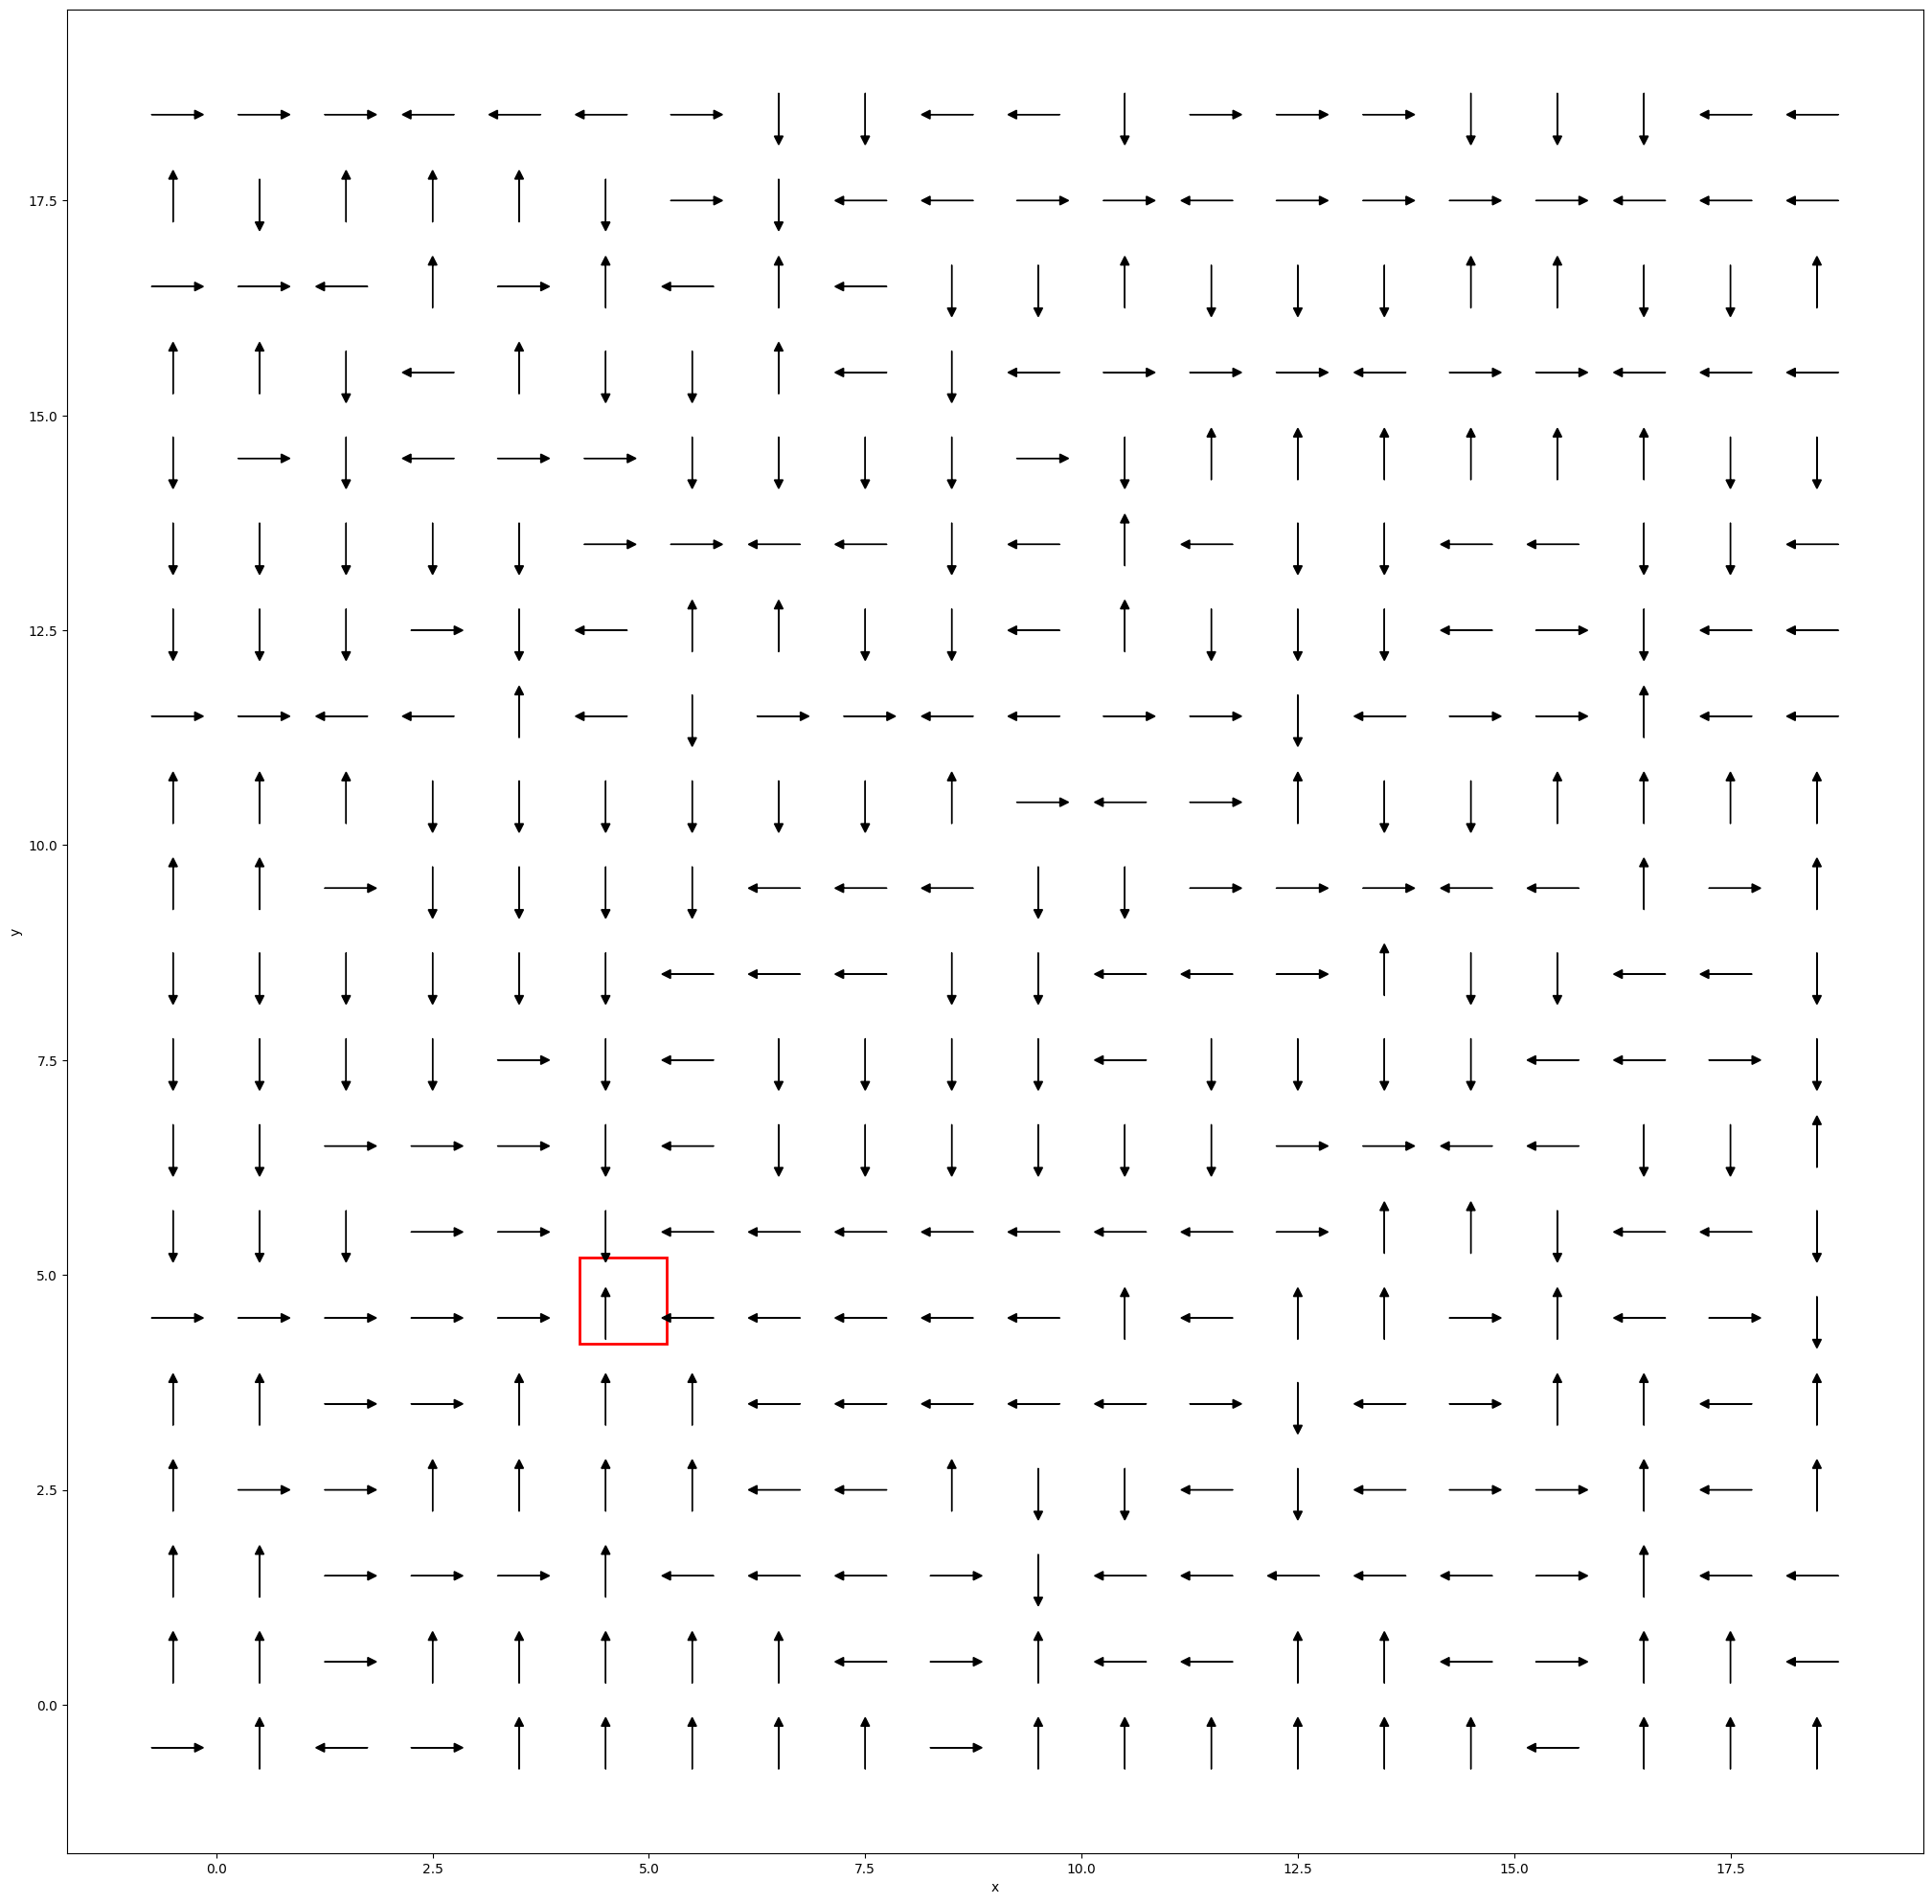

In [18]:
import matplotlib
fig,ax = plt.subplots(figsize=(25,25))
xrect=goal_x-0.80
yrect=goal_y-0.80
ANGLES=["1","2","3","4"]
rect1 = matplotlib.patches.Rectangle((xrect,yrect), 1,1, color='red', fc = 'none',lw = 2)
ax.add_patch(rect1)
ax.set_xlabel('x')
ax.set_ylabel('y')
for row in DF_graphique.itertuples():
       direction=row.angle_pris
       i=row.Pos_x
       j=row.Pos_y
       if direction == 2:  # Déplacement vers la gauche
           plt.arrow(i-0.25, j-0.5, dx=-0.5,dy=0, head_width=0.1, head_length=0.1, fc='k', ec='k')
       elif direction == 1:  # Déplacement vers la droite
           plt.arrow(i-0.75, j-0.5, dx=0.5, dy=0, head_width=0.1, head_length=0.1, fc='k', ec='k')
       elif direction == 3:  # Déplacement vers le haut
           plt.arrow(i-0.5, j-0.75, dx=0, dy=0.5, head_width=0.1, head_length=0.1, fc='k', ec='k')
       elif direction == 4:  # Déplacement vers le bas
           plt.arrow(i-0.5, j-0.25, dx=0, dy=-0.5, head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.show()

La destination est prise en compte pour toutes les coordonnées du coin inférieur droit. Cela est moins vrai pour les autres parties de la surface. Nous observons ainsi des boucles à certains endroits. 